# Diagnosing the Eliassen-Palm flux from a quasi-geostrophic double gyre ensemble

## Author(s)
List authors, their current affiliations,  up-to-date contact information, and ORCID if available. Add as many author lines as you need. 

- Author1 = {"name": "Takaya Uchida", "affiliation": "Institut des Geosciences de l'Environnement, Centre National de la Recherche Scientifique", "email": "takaya.uchida@univ-grenoble-alpes.fr", "orcid": "0000-0002-8654-6009"};
- Author2 = {"name": "Bruno Deremble", "affiliation": "Institut des Geosciences de l'Environnement, Centre National de la Recherche Scientifique", "email": "bruno.deremble@univ-grenoble-alpes.fr", "orcid": "0000-0002-5875-5014"};
- Author3 = {"name": "William K. Dewar", "affiliation": "Institut des Geosciences de l'Environnement, Centre National de la Recherche Scientifique; Department of Earth, Ocean and Atmospheric Science, Florida State University", "email": "wdewar@fsu.edu", "orcid": "0000-0002-5803-5535"};
- Author4 = {"name": "Thierry Penduff", "affiliation": "Institut des Geosciences de l'Environnement, Centre National de la Recherche Scientifique", "email": "thierry.penduff@univ-grenoble-alpes.fr", "orcid": "0000-0002-0407-8564"}.
    


## Purpose
The oceanographic and atmospheric science community has had a long standing interest in the Eliassen-Palm (E-P) flux divergence, which encapsulates the net eddy feedback onto the mean flow. Nevertheless, a comprehensive understanding of it has remained illusive. This has partially been due to the fact that the E-P flux divergence and not the flux itself appears in the momentum equations. In other words, a rotational (non-divergent) factor allows for the multiple expressions of the E-P flux. Here, we provide a brief overview on how each expression is related to one another within the quasi-geostrophic (QG) framework and diagnose them from a 101-member, seasonally-forced, three-layer, QG double-gyre ensemble simulation. In deriving the E-P flux, we define the mean as the ensemble mean and eddies as fluctuations about the ensemble mean. The ensemble dimension: i) allows us to negate the ergodic assumption where one treats a temporal mean equivalent to an ensemble mean, ii) is consistent with the definition of Reynold's decomposition, and iii) removes the arbitrary temporal and/or spatial scale in defining the mean.

## Technical contributions
- A theoretical overview on how each expression of E-P flux developed by individual authors is related to one another following the work by [Maddison and Marshall (2013)](https://doi.org/10.1017/jfm.2013.259) but within the QG framework;
- Example diagnostics of the E-P flux and its divergence in each expression.

## Methodology
We solve prognostically for the non-dimensionalized QG potential vorticity (PV) [(Deremble and Martinez, 2020)](https://doi.org/10.5281/zenodo.4669909), based on the Basilisk language [(Popinet, 2015)](https://doi.org/10.1016/j.jcp.2015.09.009):

$$
\frac{D\hat{q}}{D\hat{t}} = \widehat{\mathcal{F}} + \widehat{\mathcal{D}}, 
$$

where $q = \zeta + \beta y + f_0 (\frac{b}{N^2})_z$ is the QGPV and the $\beta$-plane approximation is applied ($f = f_0 + \beta y$; [Vallis, 2017)](https://books.google.fr/books?hl=fr&lr=&id=BTgoDwAAQBAJ&oi=fnd&pg=PR13&dq=Vallis+atmospheric&ots=wgYr69QZ2o&sig=mRDounQdCScxJ9D1VBg4GRGbLUQ&redir_esc=y#v=onepage&q=Vallis%20atmospheric&f=false). $\mathcal{F}$ and $\mathcal{D}$ are the forcing and dissipative terms, and $\widehat{(\cdot)}$ are non-dimensionalized variables.
The forcing term is the wind stress curl without any buoyancy forcing at the surface, and is kept stationary with the formulation:

$$
\widehat{\mathcal{F}} = \widehat{\boldsymbol{\nabla}}_\text{h}\times\hat{\boldsymbol{\tau}}(\hat{y}) = -\frac{\hat{f}_0 \hat{\tau}_0}{\hat{H}_1} 
    \sin{\big(\frac{2\pi}{N}\hat{y}\big)} 
    \sin{\big(\frac{\pi}{N} \hat{y}\big)},
$$

where $\boldsymbol{\nabla}_\text{h}$ is the horizontal gradient operator, and $\hat{y}\ (\in [0.5,N-0.5])$ is the non-dimensionalized meridional extent of the domain. Only the wind stress curl is prescribed in the model and not the wind stress itself ($\boldsymbol{\tau}$) but we denote it for clarity in notation.
The dissipation term is implemented via a biharmonic viscosity:

$$
\widehat{\mathcal{D}} = -{Re_4}^{-1} \widehat{\boldsymbol{\nabla}}_\text{h}^4\hat{q}.
$$

The background stratification is defined at each layer interface via the Froude number where we enforce the seasonality by varying it in time according to:

$$
Fr_i = \frac{U}{N_i H^\dagger_i} = Fr^m_i \big[1 + \hat{A}_{Fr_i} \sin{(2\pi \hat{f}_{Fr_i} \hat{t})}\big]^{-1/2},
$$

where $H^\dagger_i = (H_i + H_{i+1})/2$, $N_i$ is the buoyancy frequency, and subscript $i$ is the layer index (Figure 1). We vary $Fr_1$ in time but keep $Fr_2$ stationary ($\hat{A}_{Fr_2} = 0$; Table 1).

<div align="center">
    <img src="../Eta_schematic.png" style="width:400px;">
</div>

**Figure 1.** Vertical structure of the three-layer QG model with a rigid lid and flat bottom. The layer interface displacement ($\eta_i$) is shown in the thin curvy lines and net layer thickness is $h_i = H_i + \eta_{i-1} - \eta_i$. The stream functions ($\psi_i$) are defined within each layer.


| Parameter                       | Notation | Value | Unit   |
| ------------------------------- | -------- | ----- | - |
| <img width=200/>|<img width=200/> | <img width=200/>|<img width=200/>|
| Number of horizontal grids      | $N$              | $256$             | - |
| Number of vertical layers       | $n_l$            | $3$               | - |
| Non-dim. horizontal domain size | $\hat{L}_0$      | $80$              | - |
| Non-dim. horizontal resolution  | $\delta_\hat{x}$ | $N^{-1}\hat{L}_0$ | - | 
| Background Rossby number        | $Ro^m$           | $0.025$           | - |
| Non-dim. Coriolis parameter     | $\hat{f}_0$ | ${Ro^m}^{-1}$ | - |
| Bottom Ekman number             | $Ek^{b}$ | $0.004$ | - |
| Non-dim. surface Ekman pumping  | $\hat{\tau}_0$ | $0.0001$ | - |
| Biharmonic Reynolds number      | $Re_4$ | $1563$ | - |
| Non-dim. beta | $\hat{\beta}$   | $0.5$ | - |
| Background Froude number        | $Fr^m_1; Fr^m_2$ | $0.00409959; 0.01319355$ | - |
| Amplitude of $Fr_i$             | $\hat{A}_{Fr_1}; \hat{A}_{Fr_2}$ | $0.1; 0$ | - |
| Non-dim. frequency of $Fr_i$    | $\hat{f}_{Fr_1}; \hat{f}_{Fr_2}$ | $62.2^{-1}; 62.2^{-1}$ | - |
| Non-dim. layer thickness        | $\widehat{H}_1; \widehat{H}_2; \widehat{H}_3$ | $0.06; 0.14; 0.8$ | - |
| Non-dim. buoyancy frequency     | $\widehat{N}_i$ | ${Fr_i}^{-1}$ | - |
| Non-dim. maximum time stepping  | ${\delta_\hat{t}}^{\text{max}}$ | $5\times 10^{-2}$ | - |
| CFL condition                   | - | $0.5$ | - |
| Horizontal velocity             | $U$ | $0.1$ | [m s$^{-1}$] |
| Length scale                    | $L$ | $50$ |  [km] |
| Total layer thickness           | $H$ | $5000$ | [m] |

**Table 1.** Parameters used to configure the three-layer QG simulation and dimensionalized characteristic scales. The bottom Ekman number is the ratio between the bottom Ekman-layer thickness and $\widehat{H}_3$ and bottom friction is $\epsilon = Ek^b/(2Ro^m \widehat{H}_3)$. Beta is dimensionalized as $\beta = \hat{\beta}U/L^2$ and the dimensionalized domain size is $4000~\text{km}\ (=L_0 L)$. The frequency of $Fr$ translates approximately to a 360-day year ($=f_{Fr}^{-1} L/U$). The prognostic time stepping is determined via the CFL condition within values smaller than ${\delta_\hat{t}}^{\text{max}}$.

The characteristic length scale of the first Rossby radius of deformation (viz. radii of mesoscale eddies) is prescribed as $L\ (= 50~\text{km})$ and horizontal resolution is $\sim 15~\text{km}\ (=\delta_{\hat{x}} L)$ and so we have roughly 5 grid points per radius; our simulation can be considered mesoscale permitting.

We spin up the model for 10 years from a spun-up run with stationary forcing and then perturb the first-layer stream function at a single, random grid point with a perturbation on the order of a floating point error ($O(10^{-31})$) to generate 100 slightly perturbed stream function fields. We use the perturbed fields as the initial conditions to generate 100 ensemble members. The surface wind stress and temporally varying background stratification are kept identical during the spin up and amongst ensemble members after the spin up. Here, we provide an example analysis using the last step from the ensemble output in addition to a CTRL run without any perturbations in its initial condition.

## Results
### Theory
Although the quasi-geostrophic (QG) E-P flux has been derived numerous times [(Vallis, 2017)](https://books.google.fr/books?hl=fr&lr=&id=BTgoDwAAQBAJ&oi=fnd&pg=PR13&dq=Vallis+atmospheric&ots=wgYr69QZ2o&sig=mRDounQdCScxJ9D1VBg4GRGbLUQ&redir_esc=y#v=onepage&q=Vallis%20atmospheric&f=false), we briefly discuss it here in order to highlight the relation with its primitive equation form. The QG potential vorticity (PV) equation, neglecting the forcing and dissipative terms is:

$$\frac{Dq}{Dt} + \beta \psi_x = 0, \tag{1}$$

where the subscript denotes the derivatives with respect to $(t,z,y,x)$. Taking the ensemble average of equation (1) gives:

$$\frac{D^\#\overline{q}} {Dt} + \beta \overline{\psi}_x = -\nabla_\text{h}\cdot\overline{\boldsymbol{u}' q'}, \tag{2}$$

where $\frac{D^\#}{Dt} = \frac{\partial}{\partial t} + \overline{\boldsymbol{u}} \cdot \nabla_\text{h}$ and $\nabla_\text{h} = (\frac{\partial}{\partial x}, \frac{\partial}{\partial y})$ is the horizontal gradient operator. The ensemble-mean operator commutes with derivative with respect to $(t,z,y,x)$ and primes are defined as the fluctuations about the ensemble mean ($(\cdot)' = (\cdot) - \overline{(\cdot)}$). We see the commonly known feature of eddies feeding back onto the mean flow via the eddy QGPV flux.
An eddy flux tensor can be defined as:

$$
{\bf T} = \left(\begin{array}{ccc} 
\overline{u'v'} & \frac{1}{2} (\overline{v'v'} - \overline{u'u'}) - \frac{1}{2N^2}\overline{b'b'} & 0\\
\frac{1}{2} (\overline{v'v'} - \overline{u'u'}) + \frac{1}{2N^2}\overline{b'b'} & -\overline{v'u'} & 0\\
\frac{f_0}{N^2} \overline{u'b'} & \frac{f_0}{N^2} \overline{v'b'} & 0
\end{array}\right),
$$

which satisfies $\overline{\boldsymbol{u}' q'} = \nabla\cdot{\bf T}$ [(Vallis, 2017)](https://books.google.fr/books?hl=fr&lr=&id=BTgoDwAAQBAJ&oi=fnd&pg=PR13&dq=Vallis+atmospheric&ots=wgYr69QZ2o&sig=mRDounQdCScxJ9D1VBg4GRGbLUQ&redir_esc=y#v=onepage&q=Vallis%20atmospheric&f=false). Now, taking into consideration that the relative vorticity is derived by taking the cross product of the momentum equation, the E-P flux tensor can be defined as [(Plumb, 1986](https://doi.org/10.1175/1520-0469(1986)043<1657:TDPOTQ>2.0.CO;2); [Maddison and Marshall, 2013)](https://doi.org/10.1017/jfm.2013.259):

$${\bf E}^P = \left(\begin{array}{ccc} 
\frac{1}{2} (\overline{u'u'} - \overline{v'v'}) + \frac{1}{2N^2} \overline{b'b'} & \overline{v'u'} & 0\\
\overline{u'v'} & \frac{1}{2} (\overline{v'v'} - \overline{u'u'}) + \frac{1}{2N^2} \overline{b'b'} & 0\\
-\frac{f_0}{N^2} \overline{v'b'} & \frac{f_0}{N^2} \overline{u'b'} & 0
\end{array}\right), \tag{3}
$$

which satisfies $\boldsymbol{k}\times\overline{\boldsymbol{u}' q'} = \nabla\cdot{\bf E}^P$ where $\boldsymbol{k}$ is the vertical unit vector.
It can be further shown that:

$$
-\boldsymbol{i}\cdot(\nabla\cdot{\bf E}^P) = -(\overline{u'u'_x} + \overline{v'u'_y}) + \Big(\frac{\overline{u'u'} + \overline{v'v'}}{2} - \frac{\overline{b'b'}}{2N^2}\Big)_x + f_0\Big(\frac{\overline{v'b'}}{N^2}\Big)_z,
$$
$$
-\boldsymbol{j}\cdot(\nabla\cdot{\bf E}^P) = -(\overline{u'v'_x} + \overline{v'v'_y}) + \Big(\frac{\overline{u'u'} + \overline{v'v'}}{2} - \frac{\overline{b'b'}}{2N^2}\Big)_y - f_0\Big(\frac{\overline{u'b'}}{N^2}\Big)_z.
$$

where $\boldsymbol{i}$ and $\boldsymbol{j}$ are the zonal and meridional unit vectors.
The first terms on the right-hand side are the eddy momentum fluxes so using the E-P flux tensor expression (3), the order-Rossby number momentum equations in their residual-mean form become [(Marshall et al., 2012)](https://doi.org/10.1175/JPO-D-11-048.1):

$$
\frac{D^\#\overline{u}}{Dt} - \beta y \overline{v} - f_0(\overline{v^a+v^*}) + \Big(\overline{\phi^a} + \frac{\overline{u'u'} + \overline{v'v'}}{2} - \frac{\overline{b'b'}}{2N^2}\Big)_x = - \boldsymbol{i}\cdot(\nabla\cdot{\bf E}^P), \tag{4}
$$
$$
\frac{D^\#\overline{v}}{Dt} + \beta y \overline{u} + f_0(\overline{u^a+u^*}) + \Big(\overline{\phi^a} + \frac{\overline{u'u'} + \overline{v'v'}}{2} - \frac{\overline{b'b'}}{2N^2}\Big)_y = - \boldsymbol{j}\cdot(\nabla\cdot{\bf E}^P), \tag{5}
$$

where the superscript $a$ denotes the ageostrophic component and $\boldsymbol{u}^* = -(\frac{1}{N^2} \overline{\boldsymbol{u}'b'})_z$ is the eddy-induced velocity [(Gent and McWilliams, 1990](https://doi.org/10.1175/1520-0485(1990)020<0150:IMIOCM>2.0.CO;2); [McDougall and McIntosh, 2001)](https://doi.org/10.1175/1520-0485(2001)031<1222:TTRMVP>2.0.CO;2).
The residual-mean buoyancy equation on the other hand, is:

$$
\frac{D^\#}{Dt}\Big(\frac{\overline{b}}{N^2}\Big) + (w^a + w^*) = 0
$$

where $w^* = \boldsymbol{\nabla}_\text{h}\cdot(\frac{1}{N^2} \overline{\boldsymbol{u}'b'})$.
One may further manipulate equations (4) and (5) where the eddy kinetic energy is incorporated into the E-P flux, giving: 

$$
\frac{D^\#\overline{u}}{Dt} - \beta y \overline{v} - f_0(\overline{v^a+v^*}) + \Big(\overline{\phi^a} - \frac{\overline{b'b'}}{2N^2}\Big)_x = - \boldsymbol{i}\cdot(\nabla\cdot{\bf E}^Y), \tag{6}
$$
$$
\frac{D^\#\overline{v}}{Dt} + \beta y \overline{u} + f_0(\overline{u^a+u^*}) + \Big(\overline{\phi^a} - \frac{\overline{b'b'}}{2N^2}\Big)_y = - \boldsymbol{j}\cdot(\nabla\cdot{\bf E}^Y), \tag{7}
$$

where the E-P flux tensor is now defined as:

$$
{\bf E}^Y = \left(\begin{array}{ccc} 
\overline{u'u'} + \frac{1}{2N^2} \overline{b'b'} & \overline{v'u'} & 0 \\
\overline{u'v'} & \overline{v'v'} + \frac{1}{2N^2} \overline{b'b'} & 0 \\
-\frac{f_0}{N^2} \overline{v'b'} & \frac{f_0}{N^2} \overline{u'b'} & 0
\end{array}\right). \tag{8}
$$

Since it is the divergence of the E-P flux tensor that appears in the momentum equations and not the flux itself, the manipulation between ${\bf E}^P$ and ${\bf E}^Y$ is equivalent to adding a rotational (non-divergent) component to E-P flux [(Maddison and Marshall, 2013)](https://doi.org/10.1017/jfm.2013.259).
(We note that unlike ${\bf E}^P$, the divergence of ${\bf E}^Y$ is not the eddy PV flux, viz. $\boldsymbol{\nabla}_\text{h}\cdot{\bf E}^Y \neq \boldsymbol{k}\times\overline{\boldsymbol{u}' q'}$.)
The modified pressure in equations (6) and (7) is the QG approximation to the residual-mean pressure anomaly ($\phi^\#$) in relation to the thickness-weighted averaged (TWA) framework in primitive equations [(Young, 2012)](https://doi.org/10.1175/JPO-D-11-0102.1):

$$
\phi^\#_x = \overline{m^a_x} + \overline{z}\overline{b}_x \nonumber = \overline{\phi^a_x} - \overline{zb_x} + \overline{z}\overline{b}_x \nonumber = \overline{\phi^a_x} - \overline{z'b'_x} \nonumber \sim \Big(\overline{\phi^a} - \frac{\overline{b'b'}}{2N^2}\Big)_x,
$$
$$
\phi^\#_y = \overline{m^a_y} + \overline{z}\overline{b}_y \nonumber = \overline{\phi^a_y} - \overline{zb_y} + \overline{z}\overline{b}_y \nonumber = \overline{\phi^a_y} - \overline{z'b'_y} \nonumber \sim \Big(\overline{\phi^a} - \frac{\overline{b'b'}}{2N^2}\Big)_y,
$$

where $m\ (=\phi - bz)$ is the Montgomery potential and we have used the relation $z' \sim N^{-2}b'$.
Although equations (6)--(8) resemble more closely the momentum equations in the TWA framework, it is perhaps interesting to note that taking the cross product of equations (4) and (5), and (7) and (7) both give the mean relative vorticity equation:

$$
\frac{D^\#\overline{\zeta}}{Dt} + \beta\overline{v} - f_0(w^a + w^*)_z = - \boldsymbol{j}\cdot(\nabla\cdot{\bf E}^P)_x + \boldsymbol{i}\cdot(\nabla\cdot{\bf E}^P)_y = - \boldsymbol{j}\cdot(\nabla\cdot{\bf E}^Y)_x + \boldsymbol{i}\cdot(\nabla\cdot{\bf E}^Y)_y, \tag{9}
$$

which leads to the relation:

$$
\boldsymbol{j}\cdot(\nabla\cdot{\bf E}^P)_x - \boldsymbol{i}\cdot(\nabla\cdot{\bf E}^P)_y = \boldsymbol{\nabla}_\text{h} \cdot \overline{\boldsymbol{u}'q'} = \boldsymbol{j}\cdot(\nabla\cdot{\bf E}^Y)_x - \boldsymbol{i}\cdot(\nabla\cdot{\bf E}^Y)_y. \tag{10}
$$

We retain from equation (10) that the eddy PV flux *divergence* is insensitive to the rotational (gauge) component.

### Diagnostics from QG ensemble

The two formalisms (3) and (8) both show that the E-P flux convergence (i.e. negative divergence), which encapsulated the eddy feedback onto the mean momentum, tends to sharpen the separated jet but differ slightly in magnitude in their eddy momentum contribution, namely the diagonal components in each tensor.
In the PV equation (2), since it is the *divergence* of eddy PV flux and not the flux itself, we have shown that the net eddy feedback on the mean PV is insensitive to the formalism chosen. This allows to rephrase the sharpening of the jet as eddies acting as a source for the mean QGPV on the southern flank of the jet and sink on the northern flank of the jet.

## Funding
- Award1 = {"agency": "Agence Nationale de la Recherche", "award_code": "ANR-18-MPGA-0002", "award_URL": "https://anr.fr/ProjetIA-18-MPGA-0002 "}

## Keywords
keywords=["Quasi-geostrophy", "Eliassen-Palm flux"]

## Work In Progress - improvements
Notable TODOs:
- Examine the seasonal variability of the E-P flux divergence;
- Currently in the process of generating an ensemble with increased spatial resolution (~4 km) for better resolved mesoscale eddies;
- Further investigate the relation of the E-P flux divergence between QG and primitive equations.

## Acknowledgements
Uchida acknowledges the fruitful discussions he had with Ryan P. Abernathey and Dhruv Balwada in the eddy parametrization reading group towards the end of his Ph.D. where he was first introduced to the TWA framework.


# Setup

## Library import
Import all the required Python libraries.

In [1]:
# Data manipulation
import numpy as np
import xarray as xr
from xgcm.grid import Grid

# Parallelization
from dask.diagnostics import ProgressBar

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib as mpl
mpl.rcParams['pcolor.shading'] = 'auto'
%matplotlib inline

# Parameter definitions
We set all relevant parameters for our notebook described in Table 1. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [36]:
U    = .1                                 # Characteristic velocity scale (Rossby radius; 0.1 m s-1)
L    = 5e4                                # Characteristic length scale (Rossby radius; 50 km)
T    = L/U                                # Characteristic time scale (5e5 seconds ~ 5.8 days)
H    = 5e3                                # Dimensionalized depth (5000 m)
TAU0 = .0001                              # Non-dimensionalized wind stress amplitude
RE4  = 1563.                              # Biharmonic Reynolds number
BETA = .5                                 # Non-dimensionalized beta
N    = 256                                # Number of horizontal grids
L0   = 80                                 # Non-dimensionalized horizontal domain size
DX   = L0/N                               # Non-dimensionalized horizontal resolution (corresponds to a resolution of ~15 km)
RO   = .025                               # Rossby number
F0   = RO**-1                             # Non-dimensionalized Coriolis parameter
EKB  = .004                               # Bottom Ekman number
FR   = np.array([0.00409959,0.01319355])  # Mean Froude number defined at the layer interfaces

 
# Data import
We import the stream function from the last time step of the 101-member ensemble.


In [3]:
ds = xr.open_dataset('../psi000_10percent_lasttimestep.nc').isel(Zp1=slice(1,-1))
ds['N2'] = ('Zp1', FR**-2)                # Non-dimensionalized background stratification
ds

<xarray.Dataset>
Dimensions:  (XC: 256, XG: 256, YC: 256, YG: 256, Z: 3, Zp1: 2, nmemb: 101)
Coordinates:
  * YC       (YC) float64 0.1562 0.4688 0.7812 1.094 ... 78.91 79.22 79.53 79.84
  * XC       (XC) float64 0.1562 0.4688 0.7812 1.094 ... 78.91 79.22 79.53 79.84
  * Z        (Z) float64 0.03 0.13 0.6
    t        float32 ...
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 92 93 94 95 96 97 98 99 100
  * YG       (YG) float64 0.0 0.3125 0.625 0.9375 ... 78.75 79.06 79.38 79.69
  * XG       (XG) float64 0.0 0.3125 0.625 0.9375 ... 78.75 79.06 79.38 79.69
  * Zp1      (Zp1) float64 0.06 0.2
    drF      (Z) float64 ...
    drC      (Zp1) float64 ...
Data variables:
    psi      (nmemb, Z, YC, XC) float32 ...
    N2       (Zp1) float64 5.95e+04 5.745e+03

## Define a [`xgcm.grid`](https://doi.org/10.5281/zenodo.4056867) object

In [4]:
grid = Grid(ds, periodic=[],
            coords={'Z':{'center':'Z','inner':'Zp1'}}
           )

# Data processing and analysis
## Define the mean and eddy stream function ($\overline{\psi}, \psi'$). 

The interfacial stream function is calculated as [(Holland, 1978)](https://doi.org/10.1175/1520-0485(1978)008<0363:TROMEI>2.0.CO;2):

$$
\psi^\dagger_i = \frac{H_{i+1}\psi_i + H_i\psi_{i+1}}{H_i + H_{i+1}} 
$$

In [5]:
psib = ds.psi.mean('nmemb')      # Mean stream function
psip = ds.psi - psib             # Eddy stream function

# Inter-facial stream function
psip1 = xr.DataArray( (ds.drF.isel(Z=slice(1,None)).values[np.newaxis,:,np.newaxis,np.newaxis] 
                       * ds.psi.isel(Z=slice(None,-1)).values
                       + ds.drF.isel(Z=slice(None,-1)).values[np.newaxis,:,np.newaxis,np.newaxis] 
                       * ds.psi.isel(Z=slice(1,None)).values
                      ) / (ds.drF.isel(Z=slice(1,None)).values + ds.drF.isel(Z=slice(None,-1)).values
                          )[np.newaxis,:,np.newaxis,np.newaxis],
                     dims=['nmemb','Zp1','YC','XC'],
                     coords={'nmemb':ds.nmemb.data, 'Zp1':ds.Zp1,
                             'YC':ds.YC.data, 'XC':ds.XC.data}
                    )
psip1b = psip1.mean('nmemb')  # Mean inter-facial stream function
psip1p = psip1 - psip1b       # Eddy inter-facial stream function

## Pad the stream function to satisfy the lateral no-flux boundary condition ($\psi=0$)

In [6]:
def pad_bc(psi, bc='dirichlet'):
    """
    Pad field psi with Dirichlet or Neumann boundary conditions
    Parameters
    ----------
    psi : array [nt,nz (,ny,nx)]
    bc   : 'dirichlet' or 'neumann'
    Returns
    -------
    psi_bc: array [nt,nz (,ny+2,nx+2)]
    """
    nd = psi.ndim
    # pad only horizontal dimensions
    if nd == 3:
        psi = np.pad(psi,((0,0),(1,1),(1,1)),'constant')
    elif nd == 4:
        psi = np.pad(psi,((0,0),(0,0),(1,1),(1,1)),'constant')

    if (bc == 'dirichlet'): 
        psi[...,0,:]  = -psi[...,1,:]
        psi[...,-1,:] = -psi[...,-2,:]
        psi[...,:,0]  = -psi[...,:,1]
        psi[...,:,-1] = -psi[...,:,-2]
    
        # corners
        psi[...,0,0]   = -psi[...,0,1]   - psi[...,1,0]   - psi[...,1,1]
        psi[...,-1,0]  = -psi[...,-1,1]  - psi[...,-2,0]  - psi[...,-2,1]
        psi[...,0,-1]  = -psi[...,1,-1]  - psi[...,0,-2]  - psi[...,1,-2]
        psi[...,-1,-1] = -psi[...,-1,-2] - psi[...,-2,-2] - psi[...,-2,-1]

    elif (bc == 'neumann'): 
        psi[...,0,:]  = psi[...,1,:]
        psi[...,-1,:] = psi[...,-2,:]
        psi[...,:,0]  = psi[...,:,1]
        psi[...,:,-1] = psi[...,:,-2]
    
        # corners
        psi[...,0,0]   = psi[...,1,1]
        psi[...,-1,0]  = psi[...,-2,1]
        psi[...,0,-1]  = psi[...,1,-2]
        psi[...,-1,-1] = psi[...,-2,-2]

    return psi

In [7]:
psip1b_padded = xr.DataArray(pad_bc(psip1b), 
                             dims=['Zp1','Yp1','Xp1'],
                             coords={'Zp1':ds.Zp1.data,
                                     'Yp1':np.arange(-DX/2,L0+DX,DX),
                                     'Xp1':np.arange(-DX/2,L0+DX,DX)}
                            ).chunk({'Yp1':100,'Xp1':100})
psip1p_padded = xr.DataArray(pad_bc(psip1p), 
                             dims=['nmemb','Zp1','Yp1','Xp1'],
                             coords={'nmemb':ds.nmemb.data,
                                     'Zp1':ds.Zp1.data,
                                     'Yp1':np.arange(-DX/2,L0+DX,DX),
                                     'Xp1':np.arange(-DX/2,L0+DX,DX)}
                            ).chunk({'nmemb':10,'Yp1':100,'Xp1':100})

## Compute the horizontal velocities and buoyancy at the interfaces

$$u = -\psi_y, v = \psi_x, b = f_0\psi_z$$

In [8]:
ub = -psip1b_padded.isel(Xp1=slice(1,-1)).diff('Yp1') / DX
vb = psip1b_padded.isel(Yp1=slice(1,-1)).diff('Xp1') / DX
up = -psip1p_padded.isel(Xp1=slice(1,-1)).diff('Yp1') / DX
vp = psip1p_padded.isel(Yp1=slice(1,-1)).diff('Xp1') / DX
bb = -grid.diff(psib,'Z') / ds.drC * F0
bp = -grid.diff(psip,'Z') / ds.drC * F0

## Compute each term appearing in the E-P flux tensor

$$X = \overline{u'u'}, Y = \overline{v'v'}, M = \overline{u'v'}$$

$$P = \frac{1}{2N^2}\overline{b'b'}, R = \frac{f_0}{2N^2}\overline{u'b'}, S = -\frac{f_0}{2N^2}\overline{v'b'}$$

In [35]:
with ProgressBar():
    X = .5*xr.DataArray((up**2).mean('nmemb').isel(Yp1=slice(None,-1)).data 
                        + (up**2).mean('nmemb').isel(Yp1=slice(1,None)).data,
                        dims=['Zp1','YC','XC'], 
                        coords={'Zp1':ds.Zp1.data,
                                'YC':ds.YC.data,'XC':ds.XC.data}
                       ).compute()
    Y = .5*xr.DataArray((vp**2).mean('nmemb').isel(Xp1=slice(None,-1)).data 
                        + (vp**2).mean('nmemb').isel(Xp1=slice(1,None)).data,
                        dims=['Zp1','YC','XC'], 
                        coords={'Zp1':ds.Zp1.data,
                                'YC':ds.YC.data,'XC':ds.XC.data}
                       ).compute()
    M = (xr.DataArray(vp.isel(Xp1=slice(None,-1)).data 
                      + vp.isel(Xp1=slice(1,None)).data,
                      dims=['nmemb','Zp1','YC','XC'], 
                      coords={'nmemb':ds.nmemb.data,
                              'Zp1':ds.Zp1.data,
                              'YC':ds.YC.data,'XC':ds.XC.data})
         * xr.DataArray(up.isel(Yp1=slice(None,-1)).data 
                        + up.isel(Yp1=slice(1,None)).data,
                        dims=['nmemb','Zp1','YC','XC'], 
                        coords={'nmemb':ds.nmemb.data,
                                'Zp1':ds.Zp1.data,
                                'YC':ds.YC.data,'XC':ds.XC.data})
        ).mean('nmemb').compute() * .25
    P = .5*(bp**2).mean('nmemb').compute() / ds.N2
    R = (bp * .5*xr.DataArray(up.isel(Yp1=slice(None,-1)).data 
                              + up.isel(Yp1=slice(1,None)).data,
                              dims=['nmemb','Zp1','YC','XC'], 
                              coords={'nmemb':ds.nmemb.data,
                                      'Zp1':ds.Zp1.data,
                                      'YC':ds.YC.data,'XC':ds.XC.data})
        ).mean('nmemb').compute() * F0 / ds.N2
    S = -(bp * .5*xr.DataArray(vp.isel(Xp1=slice(None,-1)).data 
                               + vp.isel(Xp1=slice(1,None)).data,
                               dims=['nmemb','Zp1','YC','XC'], 
                               coords={'nmemb':ds.nmemb.data,
                                       'Zp1':ds.Zp1.data,
                                       'YC':ds.YC.data,'XC':ds.XC.data})
         ).mean('nmemb').compute() * F0 / ds.N2

[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  2.6s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  0.9s


## Compute the Eliassen-Palm flux in the formalism of (2)

$${\bf E}^P = \left(\begin{array}{ccc} 
\frac{1}{2} (X - Y) + P & M & 0\\
M & \frac{1}{2} (Y - X) + P & 0\\
S & R & 0
\end{array}\right).
$$

In [37]:
Ep00 = .5*(X - Y) + P
Ep01 = M
Ep11 = -.5*(X - Y) + P
Ep20 = S
Ep21 = R

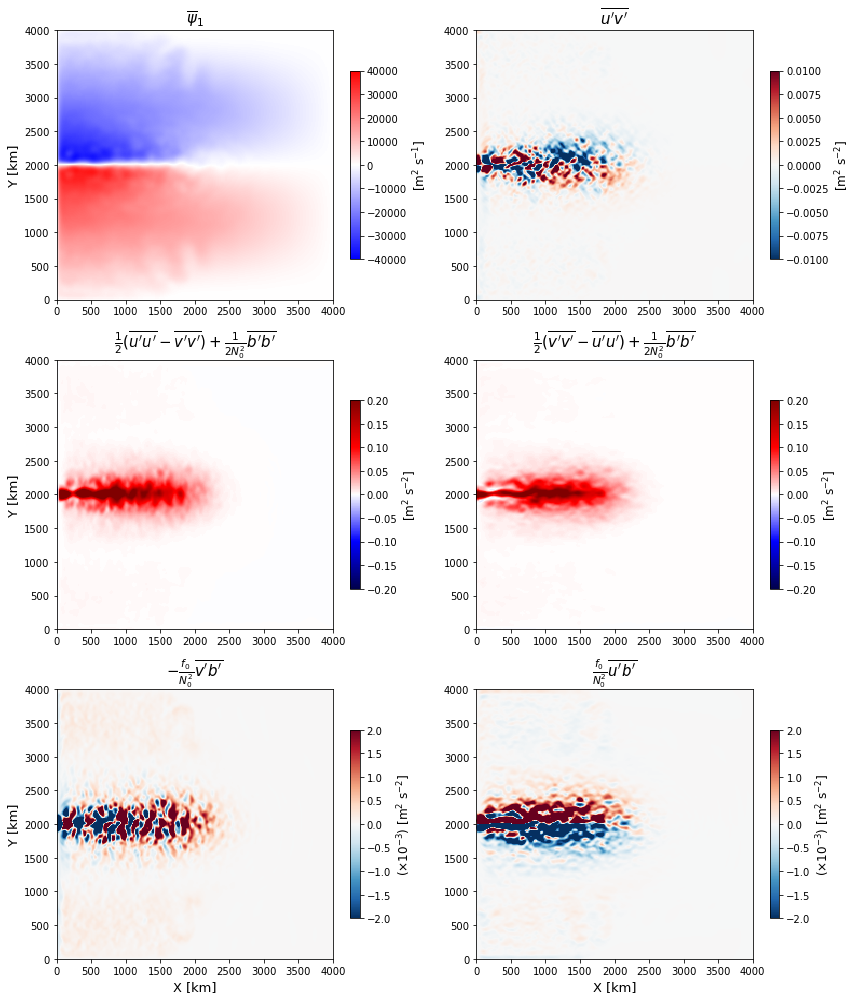

In [11]:
fig, axes = plt.subplots(figsize=(12,14), nrows=3, ncols=2)
fig.set_tight_layout(True)

im0 = axes[0,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                           psip1b.isel(Zp1=0)*U*L, 
                           vmin=-4e4, vmax=4e4, 
                           cmap='bwr', rasterized=True)
im1 = axes[0,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                           Ep01.isel(Zp1=0)*U**2,
                           vmin=-1e-2, vmax=1e-2,
                           cmap='RdBu_r', rasterized=True)
im2 = axes[1,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                           Ep00.isel(Zp1=0)*U**2, 
                           vmin=-2e-1, vmax=2e-1,
                           cmap='seismic', rasterized=True)
im3 = axes[1,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                           Ep11.isel(Zp1=0)*U**2, 
                           vmin=-2e-1, vmax=2e-1,
                           cmap='seismic', rasterized=True)
im4 = axes[2,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                           Ep20.isel(Zp1=0)*U**2 * 1e3, 
                           vmin=-2, vmax=2,
                           cmap='RdBu_r', rasterized=True)
im5 = axes[2,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                           Ep21.isel(Zp1=0)*U**2*1e3, 
                           vmin=-2, vmax=2,
                           cmap='RdBu_r', rasterized=True)

axes[0,0].set_title(r"$\overline{\psi}_1$", fontsize=15)
axes[1,0].set_title(r"$\frac{1}{2}(\overline{u'u'} - \overline{v'v'}) + \frac{1}{2 N_0^2}\overline{b'b'}$", 
                    fontsize=15)
axes[0,1].set_title(r"$\overline{u'v'}$", fontsize=15)
axes[1,1].set_title(r"$\frac{1}{2}(\overline{v'v'} - \overline{u'u'}) + \frac{1}{2 N_0^2}\overline{b'b'}$", 
                    fontsize=15)
axes[2,0].set_title(r"$-\frac{f_0}{N_0^2}\overline{v'b'}$", 
                    fontsize=15)
axes[2,1].set_title(r"$\frac{f_0}{N_0^2}\overline{u'b'}$", 
                    fontsize=15)

axes[2,0].set_xlabel(r"X [km]", fontsize=13)
axes[2,1].set_xlabel(r"X [km]", fontsize=13)
axes[0,0].set_ylabel(r"Y [km]", fontsize=13)
axes[1,0].set_ylabel(r"Y [km]", fontsize=13)
axes[2,0].set_ylabel(r"Y [km]", fontsize=13)

cbar0 = fig.colorbar(im0, ax=axes[0,0], shrink=.7)
cbar0.set_label(r"[m$^2$ s$^{-1}$]", fontsize=12)
cbar1 = fig.colorbar(im1, ax=axes[0,1], shrink=.7)
cbar1.set_label(r"[m$^2$ s$^{-2}$]", fontsize=12)
cbar2 = fig.colorbar(im2, ax=axes[1,0], shrink=.7)
cbar2.set_label(r"[m$^2$ s$^{-2}$]", fontsize=12)
cbar3 = fig.colorbar(im3, ax=axes[1,1], shrink=.7)
cbar3.set_label(r"[m$^2$ s$^{-2}$]", fontsize=12)
cbar4 = fig.colorbar(im4, ax=axes[2,0], shrink=.7)
cbar4.set_label(r"($\times 10^{-3}$) [m$^2$ s$^{-2}$]", fontsize=12)
cbar5 = fig.colorbar(im5, ax=axes[2,1], shrink=.7)
cbar5.set_label(r"($\times 10^{-3}$) [m$^2$ s$^{-2}$]", fontsize=12)

The mean stream function on the first layer interface shows a well defined separated jet extending from the western boundary.

## Compute the Eliassen-Palm flux in the formalism of (7)

$$
{\bf E}^Y = \left(\begin{array}{ccc} 
X + P & N & 0 \\
N & Y + P & 0 \\
S & R & 0
\end{array}\right).
$$

Note that only the diagonal terms are different from ${\bf E}^P$.

In [12]:
Ey00 = X + P
Ey11 = Y + P

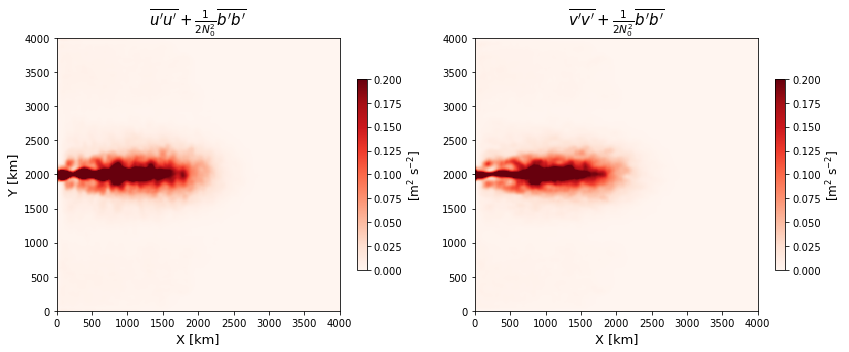

In [67]:
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
fig.set_tight_layout(True)

im2 = axes[0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                         Ey00.isel(Zp1=0)*U**2, 
                         vmin=0., vmax=2e-1,
                         cmap='Reds', rasterized=True)
im3 = axes[1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                         Ey11.isel(Zp1=0)*U**2, 
                         vmin=0, vmax=2e-1,
                         cmap='Reds', rasterized=True)

axes[0].set_title(r"$\overline{u'u'} + \frac{1}{2 N_0^2}\overline{b'b'}$", 
                    fontsize=15)
axes[1].set_title(r"$\overline{v'v'} + \frac{1}{2 N_0^2}\overline{b'b'}$", 
                    fontsize=15)

axes[0].set_xlabel(r"X [km]", fontsize=13)
axes[1].set_xlabel(r"X [km]", fontsize=13)
axes[0].set_ylabel(r"Y [km]", fontsize=13)

cbar2 = fig.colorbar(im2, ax=axes[0], shrink=.7)
cbar2.set_label(r"[m$^2$ s$^{-2}$]", fontsize=12)
cbar3 = fig.colorbar(im3, ax=axes[1], shrink=.7)
cbar3.set_label(r"[m$^2$ s$^{-2}$]", fontsize=12)

## Compute the E-P flux divergence based on the formalism of (2)

$$
-\boldsymbol{i}\cdot(\nabla\cdot{\bf E}^P) = -\Big[\frac{1}{2}\big(\overline{u'u'} - \overline{v'v'}\big) + \frac{\overline{b'b'}}{2 N_0^2}\Big]_x - \big(\overline{v'u'}\big)_y + \Big(\frac{f_0}{N_0^2}\overline{v'b'}\Big)_z\ \ (= \overline{v'q'}),
$$
$$
-\boldsymbol{j}\cdot(\nabla\cdot{\bf E}^P) = -\big(\overline{u'v'}\big)_x - \Big[\frac{1}{2}\big(\overline{v'v'} - \overline{u'u'}\big) + \frac{\overline{b'b'}}{2 N_0^2}\Big]_y -\Big(\frac{f_0}{N_0^2}\overline{u'b'}\Big)_z\ \ (= -\overline{u'q'}).
$$

In [38]:
Ep00_padded = xr.DataArray(pad_bc(Ep00), 
                           dims=['Zp1','Yp1','Xp1'],
                           coords={'Zp1':ds.Zp1.data,
                                   'Yp1':np.arange(-DX/2,L0+DX,DX),
                                   'Xp1':np.arange(-DX/2,L0+DX,DX)}
                          ).chunk({'Yp1':100,'Xp1':100})
Ep00_x = Ep00_padded.isel(Yp1=slice(1,-1)).diff('Xp1') / DX
Ep00_x = .5*xr.DataArray(Ep00_x.isel(Xp1=slice(None,-1)).data 
                         + Ep00_x.isel(Xp1=slice(1,None)).data,
                         dims=['Zp1','YC','XC'], 
                         coords={'Zp1':ds.Zp1.data,
                                 'YC':ds.YC.data,'XC':ds.XC.data}
                        )
M_padded = xr.DataArray(pad_bc(M), 
                        dims=['Zp1','Yp1','Xp1'],
                        coords={'Zp1':ds.Zp1.data,
                                'Yp1':np.arange(-DX/2,L0+DX,DX),
                                'Xp1':np.arange(-DX/2,L0+DX,DX)}
                       ).chunk({'Yp1':100,'Xp1':100})
Ep10_y = M_padded.isel(Xp1=slice(1,-1)).diff('Yp1') / DX
Ep10_y = .5*xr.DataArray(Ep10_y.isel(Yp1=slice(None,-1)).data 
                         + Ep10_y.isel(Yp1=slice(1,None)).data,
                         dims=['Zp1','YC','XC'], 
                         coords={'Zp1':ds.Zp1.data,
                                 'YC':ds.YC.data,'XC':ds.XC.data}
                        )

Ep01_x = M_padded.isel(Yp1=slice(1,-1)).diff('Xp1') / DX
Ep01_x = .5*xr.DataArray(Ep01_x.isel(Xp1=slice(None,-1)).data 
                         + Ep01_x.isel(Xp1=slice(1,None)).data,
                         dims=['Zp1','YC','XC'], 
                         coords={'Zp1':ds.Zp1.data,
                                 'YC':ds.YC.data,'XC':ds.XC.data}
                        )
Ep11_padded = xr.DataArray(pad_bc(Ep11), 
                           dims=['Zp1','Yp1','Xp1'],
                           coords={'Zp1':ds.Zp1.data,
                                   'Yp1':np.arange(-DX/2,L0+DX,DX),
                                   'Xp1':np.arange(-DX/2,L0+DX,DX)}
                          ).chunk({'Yp1':100,'Xp1':100})
Ep11_y = Ep11_padded.isel(Xp1=slice(1,-1)).diff('Yp1') / DX
Ep11_y = .5*xr.DataArray(Ep11_y.isel(Yp1=slice(None,-1)).data 
                         + Ep11_y.isel(Yp1=slice(1,None)).data,
                         dims=['Zp1','YC','XC'], 
                         coords={'Zp1':ds.Zp1.data,
                                 'YC':ds.YC.data,'XC':ds.XC.data}
                        )

Ep20_z = -(grid.diff(Ep20,'Z',boundary='extend') / ds.drF).isel(Z=1)
Ep21_z = -(grid.diff(Ep21,'Z',boundary='extend') / ds.drF).isel(Z=1)

In [14]:
# Weighted averaging 
Ep00_xC = xr.DataArray( ((ds.drC.isel(Zp1=slice(1,None)).data[:,np.newaxis,np.newaxis] 
                          * Ep00_x.isel(Zp1=slice(None,-1)).data
                          + ds.drC.isel(Zp1=slice(None,-1)).data[:,np.newaxis,np.newaxis] 
                          * Ep00_x.isel(Zp1=slice(1,None)).data
                         ) / (ds.drC.isel(Zp1=slice(1,None)).data + ds.drC.isel(Zp1=slice(None,-1)).data
                             )[:,np.newaxis,np.newaxis])[0],
                       dims=Ep20_z.dims, coords=Ep20_z.coords
                      )
Ep01_xC = xr.DataArray( ((ds.drC.isel(Zp1=slice(1,None)).data[:,np.newaxis,np.newaxis] 
                          * Ep01_x.isel(Zp1=slice(None,-1)).data
                          + ds.drC.isel(Zp1=slice(None,-1)).data[:,np.newaxis,np.newaxis] 
                          * Ep01_x.isel(Zp1=slice(1,None)).data
                         ) / (ds.drC.isel(Zp1=slice(1,None)).data + ds.drC.isel(Zp1=slice(None,-1)).data
                             )[:,np.newaxis,np.newaxis])[0],
                       dims=Ep21_z.dims, coords=Ep21_z.coords
                      )
Ep10_yC = xr.DataArray( ((ds.drC.isel(Zp1=slice(1,None)).data[:,np.newaxis,np.newaxis] 
                          * Ep10_y.isel(Zp1=slice(None,-1)).data
                          + ds.drC.isel(Zp1=slice(None,-1)).data[:,np.newaxis,np.newaxis] 
                          * Ep10_y.isel(Zp1=slice(1,None)).data
                         ) / (ds.drC.isel(Zp1=slice(1,None)).data + ds.drC.isel(Zp1=slice(None,-1)).data
                             )[:,np.newaxis,np.newaxis])[0],
                       dims=Ep20_z.dims, coords=Ep20_z.coords
                      )
Ep11_yC = xr.DataArray( ((ds.drC.isel(Zp1=slice(1,None)).data[:,np.newaxis,np.newaxis] 
                          * Ep11_y.isel(Zp1=slice(None,-1)).data
                          + ds.drC.isel(Zp1=slice(None,-1)).data[:,np.newaxis,np.newaxis] 
                          * Ep11_y.isel(Zp1=slice(1,None)).data
                         ) / (ds.drC.isel(Zp1=slice(1,None)).data + ds.drC.isel(Zp1=slice(None,-1)).data
                             )[:,np.newaxis,np.newaxis])[0],
                       dims=Ep21_z.dims, coords=Ep21_z.coords
                      )
Epx = ((Ep00_xC + Ep10_yC)/L + Ep20_z/H)*U**2
Epy = ((Ep01_xC + Ep11_yC)/L + Ep21_z/H)*U**2

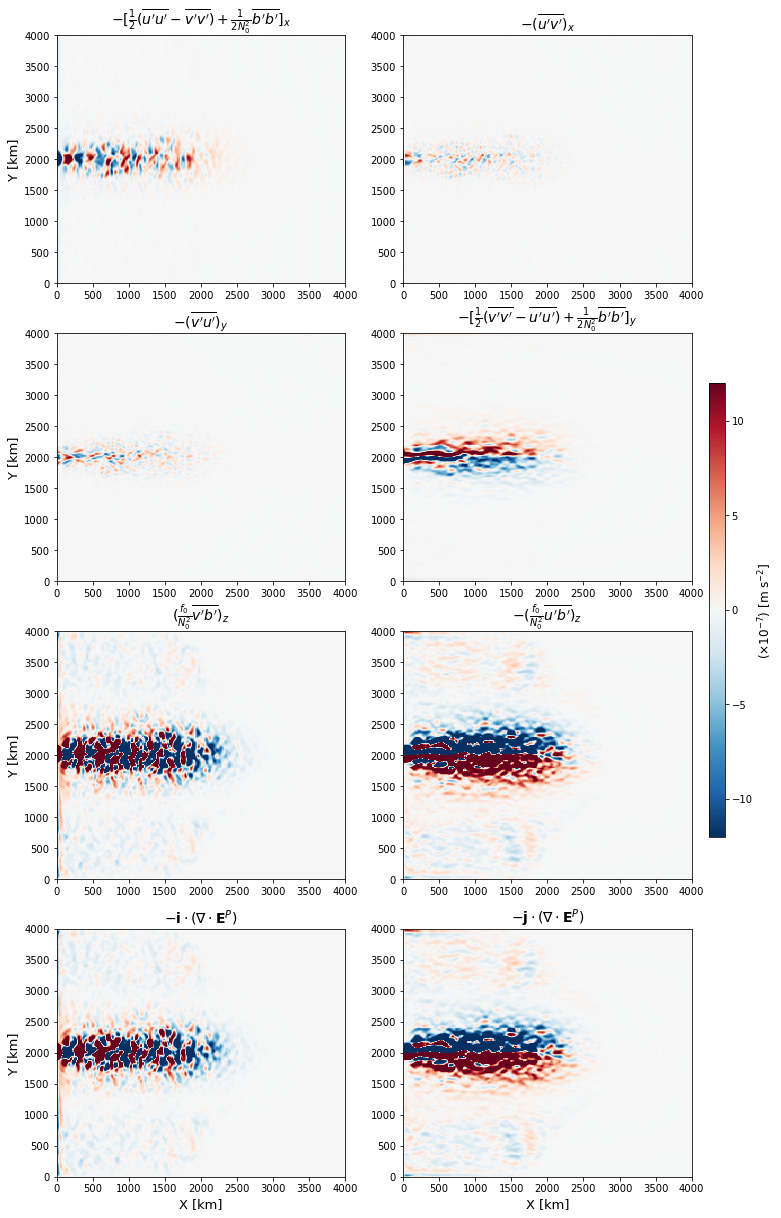

In [20]:
vmax = 12
fig, axes = plt.subplots(figsize=(12,21), nrows=4, ncols=2)
# fig.set_tight_layout(True)

im = axes[0,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                          -Ep00_xC * U**2/L*1e7, 
                          vmin=-vmax, vmax=vmax,
                          cmap='RdBu_r', rasterized=True)
axes[1,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                     -Ep10_yC * U**2/L*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[0,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                     -Ep01_xC * U**2/L*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[1,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                     -Ep11_yC * U**2/L*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[2,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                     -Ep20_z * U**2/H*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[2,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                     -Ep21_z * U**2/H*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[3,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                     -Epx*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[3,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                     -Epy*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)


axes[0,0].set_title(r"$-[\frac{1}{2}(\overline{u'u'} - \overline{v'v'}) + \frac{1}{2 N_0^2}\overline{b'b'}]_x$", 
                    fontsize=14)
axes[1,0].set_title(r"$-(\overline{v'u'})_y$", 
                    fontsize=14)
axes[0,1].set_title(r"$-(\overline{u'v'})_x$", 
                    fontsize=14)
axes[1,1].set_title(r"$-[\frac{1}{2}(\overline{v'v'} - \overline{u'u'}) + \frac{1}{2 N_0^2}\overline{b'b'}]_y$", 
                    fontsize=14)
axes[2,0].set_title(r"$(\frac{f_0}{N_0^2}\overline{v'b'})_z$", 
                    fontsize=14)
axes[2,1].set_title(r"$-(\frac{f_0}{N_0^2}\overline{u'b'})_z$", 
                    fontsize=14)
axes[3,0].set_title(r"$-{\bf i} \cdot(\nabla\cdot{\bf E}^P)$", fontsize=14)
axes[3,1].set_title(r"$-{\bf j} \cdot(\nabla\cdot{\bf E}^P)$", fontsize=14)

axes[3,0].set_xlabel(r"X [km]", fontsize=13)
axes[3,1].set_xlabel(r"X [km]", fontsize=13)
axes[0,0].set_ylabel(r"Y [km]", fontsize=13)
axes[1,0].set_ylabel(r"Y [km]", fontsize=13)
axes[2,0].set_ylabel(r"Y [km]", fontsize=13)
axes[3,0].set_ylabel(r"Y [km]", fontsize=13)

fig.subplots_adjust(right=0.86)
cbaxes = fig.add_axes([0.88, 0.35, 0.018, 0.3]) 
cbar = fig.colorbar(im, orientation='vertical', cax=cbaxes,
                   )
cbar.set_label(r"($\times 10^{-7}$) [m s$^{-2}$]", fontsize=12)

The zonal component ($-\boldsymbol{i}\cdot(\boldsymbol{\nabla}\cdot {\bf E}^P)$) shows repeating dipole-like features in the separated jet region and likely contributing to the zonal meandering of the mean jet.
The meridional component ($-\boldsymbol{j}\cdot(\boldsymbol{\nabla}\cdot {\bf E}^P)$) tends to accelerate the jet northward on the southern flank and southward on the northern flank, leading to a sharpening of the jet.

## Compute the E-P flux divergence based on the formalism of (7)

$$
-\boldsymbol{i}\cdot(\nabla\cdot{\bf E}^Y) = -\Big(\overline{u'u'} + \frac{\overline{b'b'}}{2 N_0^2}\Big)_x - \big(\overline{v'u'}\big)_y + \Big(\frac{f_0}{N_0^2}\overline{v'b'}\Big)_z,
$$
$$
-\boldsymbol{j}\cdot(\nabla\cdot{\bf E}^Y) = -\big(\overline{u'v'}\big)_x - \Big(\overline{v'v'} + \frac{\overline{b'b'}}{2 N_0^2}\Big)_y -\Big(\frac{f_0}{N_0^2}\overline{u'b'}\Big)_z.
$$

In [15]:
Ey00_padded = xr.DataArray(pad_bc(Ey00), 
                           dims=['Zp1','Yp1','Xp1'],
                           coords={'Zp1':ds.Zp1.data,
                                   'Yp1':np.arange(-DX/2,L0+DX,DX),
                                   'Xp1':np.arange(-DX/2,L0+DX,DX)}
                          ).chunk({'Yp1':100,'Xp1':100})
Ey00_x = Ey00_padded.isel(Yp1=slice(1,-1)).diff('Xp1') / DX
Ey00_x = .5*xr.DataArray(Ey00_x.isel(Xp1=slice(None,-1)).data 
                         + Ey00_x.isel(Xp1=slice(1,None)).data,
                         dims=['Zp1','YC','XC'], 
                         coords={'Zp1':ds.Zp1.data,
                                 'YC':ds.YC.data,'XC':ds.XC.data}
                        )

Ey11_padded = xr.DataArray(pad_bc(Ey11), 
                           dims=['Zp1','Yp1','Xp1'],
                           coords={'Zp1':ds.Zp1.data,
                                   'Yp1':np.arange(-DX/2,L0+DX,DX),
                                   'Xp1':np.arange(-DX/2,L0+DX,DX)}
                          ).chunk({'Yp1':100,'Xp1':100})
Ey11_y = Ey11_padded.isel(Xp1=slice(1,-1)).diff('Yp1') / DX
Ey11_y = .5*xr.DataArray(Ey11_y.isel(Yp1=slice(None,-1)).data 
                         + Ey11_y.isel(Yp1=slice(1,None)).data,
                         dims=['Zp1','YC','XC'], 
                         coords={'Zp1':ds.Zp1.data,
                                 'YC':ds.YC.data,'XC':ds.XC.data}
                        )

In [16]:
# Weighted averaging 
Ey00_xC = xr.DataArray( ((ds.drC.isel(Zp1=slice(1,None)).data[:,np.newaxis,np.newaxis] 
                          * Ey00_x.isel(Zp1=slice(None,-1)).data
                          + ds.drC.isel(Zp1=slice(None,-1)).data[:,np.newaxis,np.newaxis] 
                          * Ey00_x.isel(Zp1=slice(1,None)).data
                         ) / (ds.drC.isel(Zp1=slice(1,None)).data + ds.drC.isel(Zp1=slice(None,-1)).data
                             )[:,np.newaxis,np.newaxis])[0],
                       dims=Ep20_z.dims, coords=Ep20_z.coords
                      )
Ey11_yC = xr.DataArray( ((ds.drC.isel(Zp1=slice(1,None)).data[:,np.newaxis,np.newaxis] 
                          * Ey11_y.isel(Zp1=slice(None,-1)).data
                          + ds.drC.isel(Zp1=slice(None,-1)).data[:,np.newaxis,np.newaxis] 
                          * Ey11_y.isel(Zp1=slice(1,None)).data
                         ) / (ds.drC.isel(Zp1=slice(1,None)).data + ds.drC.isel(Zp1=slice(None,-1)).data
                             )[:,np.newaxis,np.newaxis])[0],
                       dims=Ep21_z.dims, coords=Ep21_z.coords
                      )
Eyx = ((Ey00_xC + Ep10_yC)/L + Ep20_z/H)*U**2
Eyy = ((Ep01_xC + Ey11_yC)/L + Ep21_z/H)*U**2

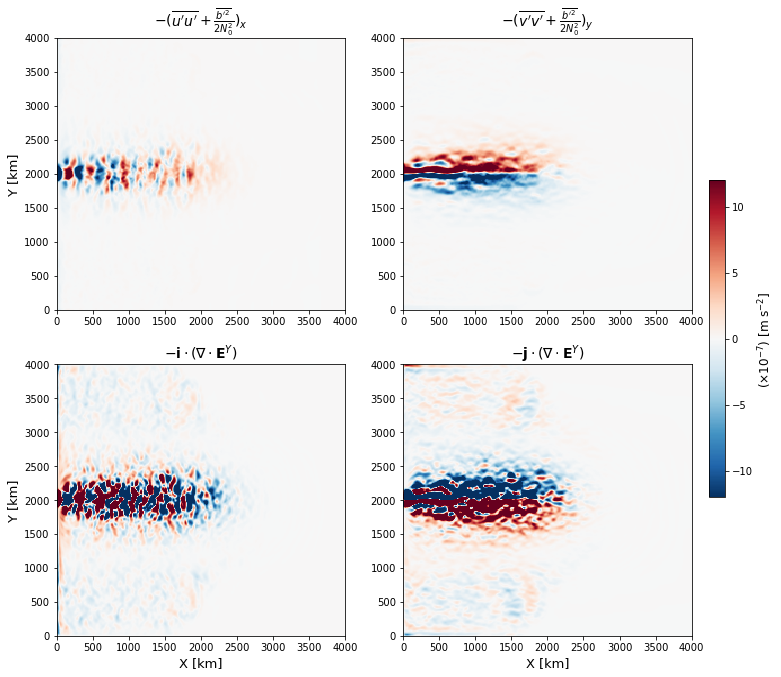

In [27]:
vmax = 12
fig, axes = plt.subplots(figsize=(12,11), nrows=2, ncols=2)
# fig.set_tight_layout(True)

im = axes[0,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                          -Ey00_xC * U**2/L*1e7, 
                          vmin=-vmax, vmax=vmax,
                          cmap='RdBu_r', rasterized=True)
axes[0,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                     -Ey11_yC * U**2/L*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[1,0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                     -Eyx*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)
axes[1,1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3, 
                     -Eyy*1e7, 
                     vmin=-vmax, vmax=vmax,
                     cmap='RdBu_r', rasterized=True)


axes[0,0].set_title(r"$-(\overline{u'u'} + \frac{\overline{b'^2}}{2 N_0^2})_x$", 
                    fontsize=14)
axes[0,1].set_title(r"$-(\overline{v'v'} + \frac{\overline{b'^2}}{2 N_0^2})_y$", 
                    fontsize=14)
axes[1,0].set_title(r"$-{\bf i} \cdot(\nabla\cdot{\bf E}^Y)$", fontsize=14)
axes[1,1].set_title(r"$-{\bf j} \cdot(\nabla\cdot{\bf E}^Y)$", fontsize=14)

axes[1,0].set_xlabel(r"X [km]", fontsize=13)
axes[1,1].set_xlabel(r"X [km]", fontsize=13)
axes[0,0].set_ylabel(r"Y [km]", fontsize=13)
axes[1,0].set_ylabel(r"Y [km]", fontsize=13)

fig.subplots_adjust(right=0.86)
cbaxes = fig.add_axes([0.88, 0.3, 0.018, 0.4]) 
cbar = fig.colorbar(im, orientation='vertical', cax=cbaxes,
                   )
cbar.set_label(r"($\times 10^{-7}$) [m s$^{-2}$]", fontsize=12)

## Examine that the two formalisms converge

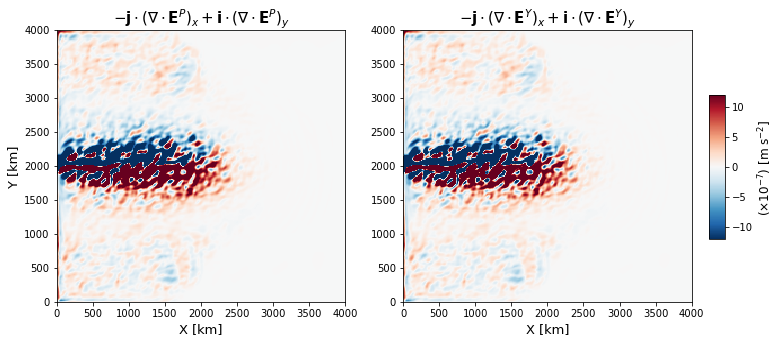

In [17]:
vmax = 12

fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

im2 = axes[0].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                         -(Epy-Epx)*1e7, 
                         vmin=-vmax, vmax=vmax,
                         cmap='RdBu_r', rasterized=True)
im3 = axes[1].pcolormesh(ds.XC*L*1e-3, ds.YC*L*1e-3,
                         -(Eyy-Eyx)*1e7, 
                         vmin=-vmax, vmax=vmax,
                         cmap='RdBu_r', rasterized=True)

axes[0].set_title(r"$-{\bf j}\cdot(\nabla\cdot{\bf E}^P)_x + {\bf i}\cdot(\nabla\cdot{\bf E}^P)_y$", 
                    fontsize=15)
axes[1].set_title(r"$-{\bf j}\cdot(\nabla\cdot{\bf E}^Y)_x + {\bf i}\cdot(\nabla\cdot{\bf E}^Y)_y$", 
                    fontsize=15)

axes[0].set_xlabel(r"X [km]", fontsize=13)
axes[1].set_xlabel(r"X [km]", fontsize=13)
axes[0].set_ylabel(r"Y [km]", fontsize=13)

fig.subplots_adjust(right=0.86)
cbaxes = fig.add_axes([0.88, 0.3, 0.018, 0.4]) 
cbar = fig.colorbar(im2, orientation='vertical', cax=cbaxes,
                   )
cbar.set_label(r"($\times 10^{-7}$) [m s$^{-2}$]", fontsize=12)

The Eliassen-Palm flux convergence (i.e. negative divergence) acts as a source for the mean QGPV on the southern flank of the jet and sink on the northern flank of the jet.

# References

- [Deremble, B. & Martinez, E.M. (2020) MSOM: Multiple Scale Ocean Model. doi: 10.5281/zenodo.4669909.](https://doi.org/10.5281/zenodo.4669909)
- [Gent, P.R. & McWilliams, J.C. (1990) Isopycnal mixing in ocean circulation models. *Journal of Physical Oceanography*. **20**, 150--155. doi: 10.1175/1520-0485(1990)020<0150:IMIOCM>2.0.CO;2.](https://doi.org/10.1175/1520-0485(1990)020<0150:IMIOCM>2.0.CO;2)
- [Holland, W. (1978) The role of mesoscale eddies in the general circulation of the ocean---Numerical experiments using a wind-driven quasi-geostrophic model. *Journal of Physical Oceanography*. **8**, 363--392. doi: 10.1175/1520-0485(1978)008<0363:TROMEI>2.0.CO;2.](https://doi.org/10.1175/1520-0485(1978)008<0363:TROMEI>2.0.CO;2)
- [McDougall, T.J. & McIntosh, P.C. (2001) The temporal-residual-mean velocity. Part II: Isopycnal interpretation and the tracer and momentum equations. *Journal of Physical Oceanography*. **31**, 1222--1246. doi: 10.1175/1520-0485(2001)031<1222:TTRMVP>2.0.CO;2.](https://doi.org/10.1175/1520-0485(2001)031<1222:TTRMVP>2.0.CO;2)
- [Maddison, J.R. & Marshall, D.P. (2013) The Eliassen--Palm flux tensor. *Journal of Fluid Mechanics*. **729**, 69--102. doi: 10.1017/jfm.2013.259.](https://doi.org/10.1017/jfm.2013.259)
- [Marshall, D.P.; Maddison, J.R. & Berloff, P. (2012) A Framework for Parameterizing Eddy Potential Vorticity Fluxes. *Journal of Physical Oceanography*. **42**, 539--557. doi: 10.1175/JPO-D-11-048.1.](https://doi.org/10.1175/JPO-D-11-048.1)
- [Plumb, A.R. (1986) Three-dimensional propagation of transient quasi-geostrophic eddies and its relationship with the eddy forcing of the time—mean flow. *Journal of Atmospheric Sciences*. **43**, 1657--1678. doi: 10.1175/1520-0469(1986)043<1657:TDPOTQ>2.0.CO;2.](https://doi.org/10.1175/1520-0469(1986)043<1657:TDPOTQ>2.0.CO;2)
- [Popinet, S. (2015) A quadtree-adaptive multigrid solver for the Serre-Green-Naghdi equations. *Journal of Computational Physics*. **302**, 336--358. doi: 10.1016/j.jcp.2015.09.009.](https://doi.org/10.1016/j.jcp.2015.09.009)
- [Vallis, G. (2017) *Atmospheric and oceanic fluid dynamics*. Cambridge University Press.](https://books.google.fr/books?hl=fr&lr=&id=BTgoDwAAQBAJ&oi=fnd&pg=PR13&dq=Vallis+atmospheric&ots=wgYr69QZ2o&sig=mRDounQdCScxJ9D1VBg4GRGbLUQ&redir_esc=y#v=onepage&q=Vallis%20atmospheric&f=false)
- [Xgcm developers. (2021) xgcm: General Circulation Model Postprocessing with xarray. doi: 10.5281/zenodo.4056867](https://doi.org/10.5281/zenodo.4056867)
- [Young, W.R. (2012) An Exact Thickness-Weighted Average Formulation of the Boussinesq Equations. *Journal of Physical Oceanography*. **42**, 692--707. doi: 10.1175/JPO-D-11-0102.1](https://doi.org/10.1175/JPO-D-11-0102.1)